Creation of a clustering model to evaluate fish species based on length, width, and length width ratio

In [10]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
# import data as dataframe
fish = pd.read_csv('fish_data.csv')
fish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


Data & Visualizations

In [4]:
fish['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

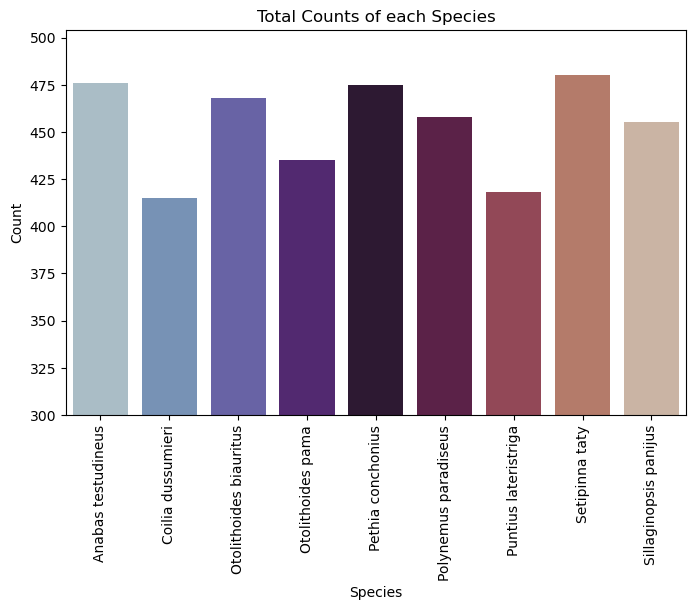

In [63]:
plt.figure(figsize=(8, 5))

# Bar chart of example counts for species
sns.countplot(x='species', data=fish, hue='species', palette='twilight')

plt.title('Total Counts of each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.ylim(300,)
plt.show()

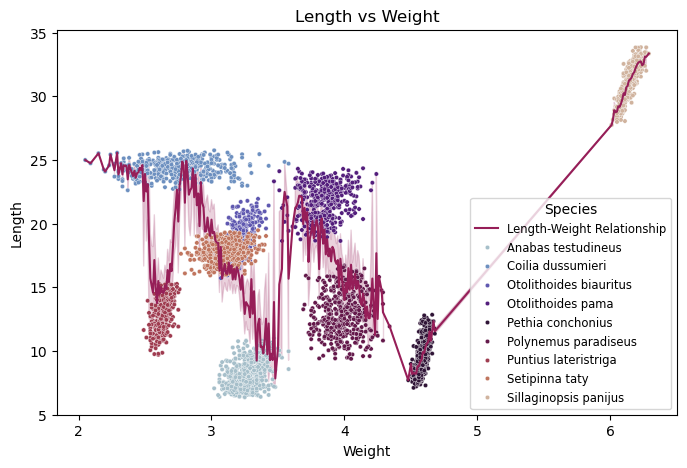

In [79]:
# length and width comparison with a line chart for the overall length and weight &
# scatterplot for length and weights of specific fish species
plt.figure(figsize=(8, 5))
sns.lineplot(x='weight', y='length', data=fish, linestyle='-', color='#961e58', label='Length-Weight Relationship')
# Color options
    #593157 - dark ourple
    #802a53
# scatterplot to overlay colored points by species
sns.scatterplot(x='weight', y='length', data=fish, hue='species', palette='twilight', s=10, legend=True)
plt.title('Length vs Weight')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.legend(title='Species', fontsize='small', title_fontsize='medium')
plt.show()


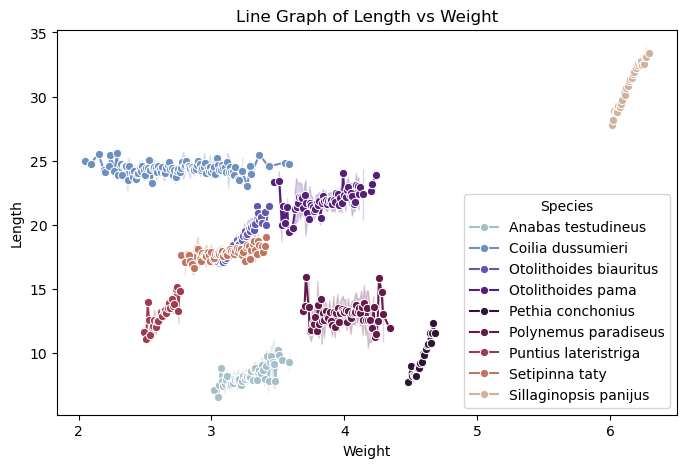

In [ ]:
# length v weight by species
plt.figure(figsize=(8, 5))
sns.lineplot(x='weight', y='length', data=fish, marker='o', linestyle='-', hue='species', palette='twilight')
plt.title('Line Graph of Length vs Weight')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.legend(title='Species')
plt.show()

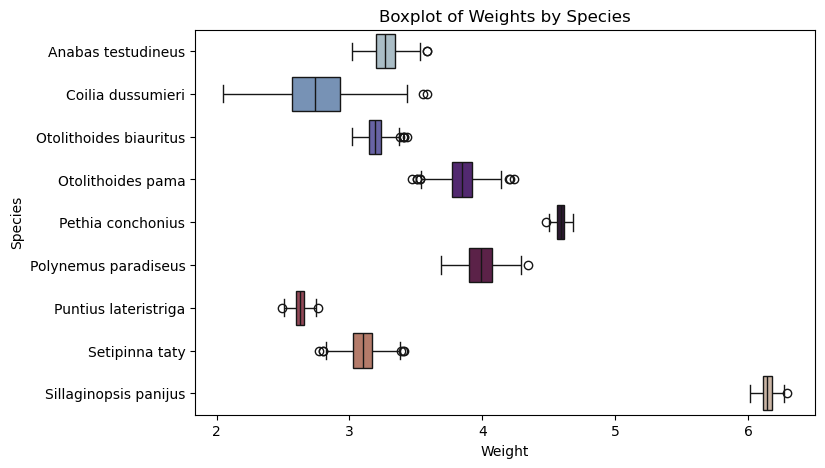

In [ ]:
# boxplot of weight by species
plt.figure(figsize=(8, 5))
sns.boxplot(y='species', x='weight', data=fish, hue='species', palette='twilight')
plt.title('Boxplot of Weights by Species')
plt.xlabel('Weight')
plt.ylabel('Species')
plt.show()

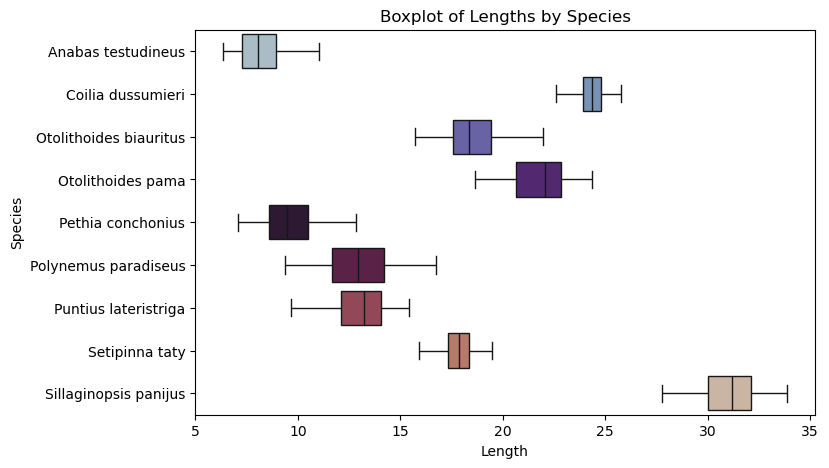

In [ ]:
# boxplot of length by species
plt.figure(figsize=(8, 5))
sns.boxplot(y='species', x='length', data=fish, hue='species', palette='twilight')
plt.title('Boxplot of Lengths by Species')
plt.xlabel('Length')
plt.ylabel('Species')
plt.show()

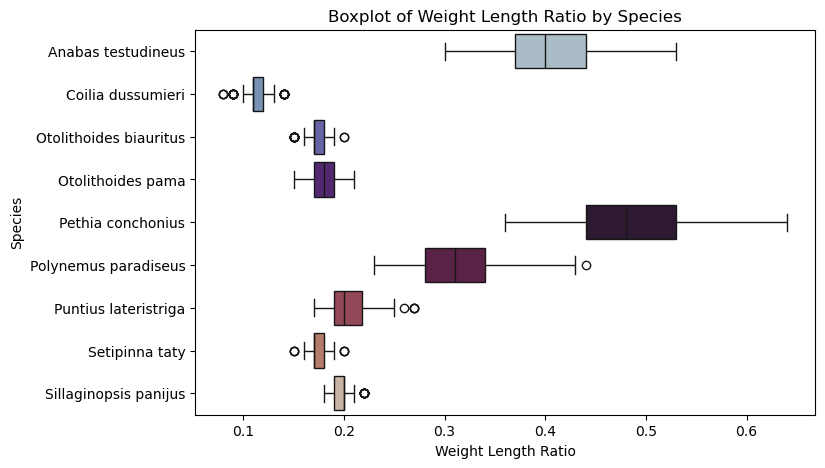

In [81]:
# boxplot of weight length ratio by species
plt.figure(figsize=(8, 5))
sns.boxplot(y='species', x='w_l_ratio', data=fish, hue='species', palette='twilight')
plt.title('Boxplot of Weight Length Ratio by Species')
plt.xlabel('Weight Length Ratio')
plt.ylabel('Species')
plt.show()

In [ ]:
# ranges for w,l,ratio & w,l,ratio by species
for col in ['weight', 'length', 'w_l_ratio']:
    min_val = fish[col].min()
    max_val = fish[col].max()
    range_val = max_val - min_val
    print(f"Range for {col}: Min={min_val}, Max={max_val}, Range={range_val}")

for col in ['weight', 'length', 'w_l_ratio']:
    print(f"\nRange for {col} by Species:")
    species_group = fish.groupby('species')[col].agg(['min', 'max'])
    species_group['range'] = species_group['max'] - species_group['min']
    
    for species, values in species_group.iterrows():
        print(f"{species}: Min={values['min']}, Max={values['max']}, Range={values['range']}")

Range for weight: Min=2.05, Max=6.29, Range=4.24
Range for length: Min=6.36, Max=33.86, Range=27.5
Range for w_l_ratio: Min=0.08, Max=0.64, Range=0.56

Range for weight by Species:
Anabas testudineus: Min=3.02, Max=3.58, Range=0.56
Coilia dussumieri: Min=2.05, Max=3.58, Range=1.5300000000000002
Otolithoides biauritus: Min=3.02, Max=3.43, Range=0.41000000000000014
Otolithoides pama: Min=3.47, Max=4.24, Range=0.77
Pethia conchonius: Min=4.48, Max=4.68, Range=0.1999999999999993
Polynemus paradiseus: Min=3.69, Max=4.34, Range=0.6499999999999999
Puntius lateristriga: Min=2.49, Max=2.76, Range=0.2699999999999996
Setipinna taty: Min=2.77, Max=3.41, Range=0.6400000000000001
Sillaginopsis panijus: Min=6.01, Max=6.29, Range=0.28000000000000025

Range for length by Species:
Anabas testudineus: Min=6.36, Max=11.01, Range=4.6499999999999995
Coilia dussumieri: Min=22.62, Max=25.76, Range=3.1400000000000006
Otolithoides biauritus: Min=15.72, Max=21.95, Range=6.229999999999999
Otolithoides pama: Min=1

Pre-Processing

In [89]:
# check for duplicates
duplicates = fish[fish.duplicated()]
print("Number of duplicate rows:", duplicates.shape[0])
if not duplicates.empty:
    print("Duplicate rows:")
    print(duplicates[['species']].value_counts())
else:
    print("No duplicate rows found.")

# check for null values
null_values = fish.isnull().sum()
print(f"Null values in each column:\n{null_values}")

# There are no null values but there are 109 duplicated rows. While this may be viable since fishes can have the same weight and length, 
# especially if theyre the same species, I will be removing them.'''

Number of duplicate rows: 109
Duplicate rows:
species               
Sillaginopsis panijus     26
Pethia conchonius         21
Puntius lateristriga      15
Anabas testudineus        14
Otolithoides biauritus    12
Otolithoides pama          7
Coilia dussumieri          6
Polynemus paradiseus       4
Setipinna taty             4
Name: count, dtype: int64
Null values in each column:
species      0
length       0
weight       0
w_l_ratio    0
dtype: int64


In [92]:
del_dup = fish.drop_duplicates()
del_dup['species'].value_counts()

species
Setipinna taty            476
Anabas testudineus        462
Otolithoides biauritus    456
Pethia conchonius         454
Polynemus paradiseus      454
Sillaginopsis panijus     429
Otolithoides pama         428
Coilia dussumieri         409
Puntius lateristriga      403
Name: count, dtype: int64

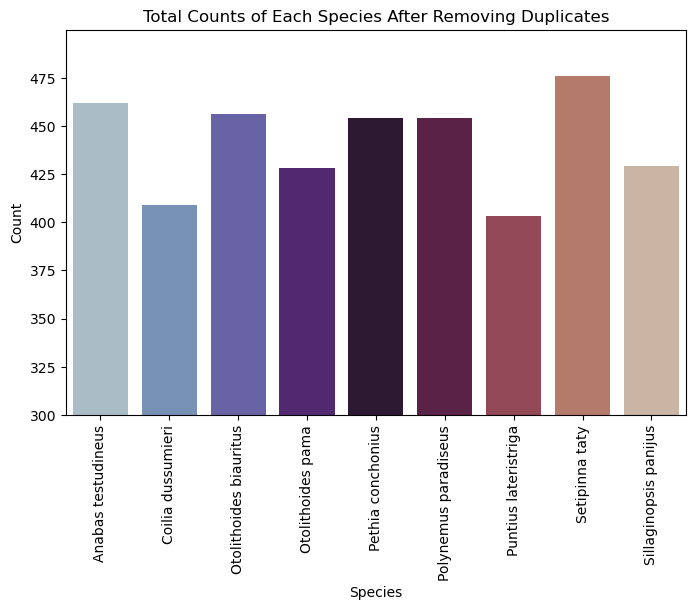

In [96]:
plt.figure(figsize=(8, 5))

# Bar chart of example counts for species after removing duplicates
sns.countplot(x='species', data=del_dup, hue='species', palette='twilight')

plt.title('Total Counts of Each Species After Removing Duplicates')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.ylim(300,)
plt.show()

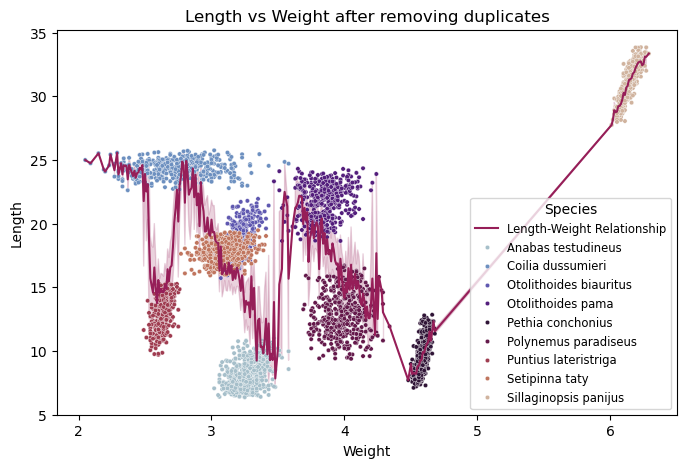

In [97]:
# length and width comparison with a line chart for the overall length and weight &
# scatterplot for length and weights of specific fish species after removing duplicates
plt.figure(figsize=(8, 5))
sns.lineplot(x='weight', y='length', data=del_dup, linestyle='-', color='#961e58', label='Length-Weight Relationship')
# Color options
    #593157 - dark ourple
    #802a53
# scatterplot to overlay colored points by species
sns.scatterplot(x='weight', y='length', data=del_dup, hue='species', palette='twilight', s=10, legend=True)
plt.title('Length vs Weight after removing duplicates')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.legend(title='Species', fontsize='small', title_fontsize='medium')
plt.show()

In [99]:
fishy = del_dup 
fishy

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4074,Sillaginopsis panijus,30.61,6.08,0.20
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19


In [102]:
# split fishs into label (species) and features (l, w, wl ratio) for effective unsupervised learning
fishy_labels = fishy['species']
fishy_data = fishy_data = fishy.drop('species', axis=1)

In [103]:
fishy_labels

0          Anabas testudineus
1          Anabas testudineus
2          Anabas testudineus
3          Anabas testudineus
4          Anabas testudineus
                ...          
4074    Sillaginopsis panijus
4075    Sillaginopsis panijus
4076    Sillaginopsis panijus
4077    Sillaginopsis panijus
4079    Sillaginopsis panijus
Name: species, Length: 3971, dtype: object

In [104]:
fishy_data

,length,weight,w_l_ratio
0,10.66,3.45,0.32
1,6.91,3.27,0.47
2,8.38,3.46,0.41
3,7.57,3.36,0.44
4,10.83,3.38,0.31
...,...,...,...
4074,30.61,6.08,0.20
4075,30.56,6.12,0.20
4076,29.66,6.11,0.21
4077,32.81,6.25,0.19


Classification Model: K-Means

Model Evaluation

Classification Model: Agglomerative

Model Evaluation

Classfication Model: K-Distance

Model Evaluation